In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
train_df = pd.read_csv('../data/raw/train.csv')

In [3]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [5]:
train_df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [6]:
null_percent = train_df.isnull().mean() * 100 
null_percent.sort_values(ascending=False)

Stage_fear                   10.219175
Going_outside                 7.914057
Post_frequency                6.823580
Time_spent_Alone              6.424098
Social_event_attendance       6.370114
Drained_after_socializing     6.202764
Friends_circle_size           5.689916
id                            0.000000
Personality                   0.000000
dtype: float64

In [7]:
train_df.drop('id',axis=1,inplace=True)

In [8]:
train_df['Friends_circle_size'] = train_df['Friends_circle_size'].fillna(train_df['Friends_circle_size'].mean())

array([[<Axes: title={'center': 'Time_spent_Alone'}>,
        <Axes: title={'center': 'Social_event_attendance'}>],
       [<Axes: title={'center': 'Going_outside'}>,
        <Axes: title={'center': 'Friends_circle_size'}>],
       [<Axes: title={'center': 'Post_frequency'}>, <Axes: >]],
      dtype=object)

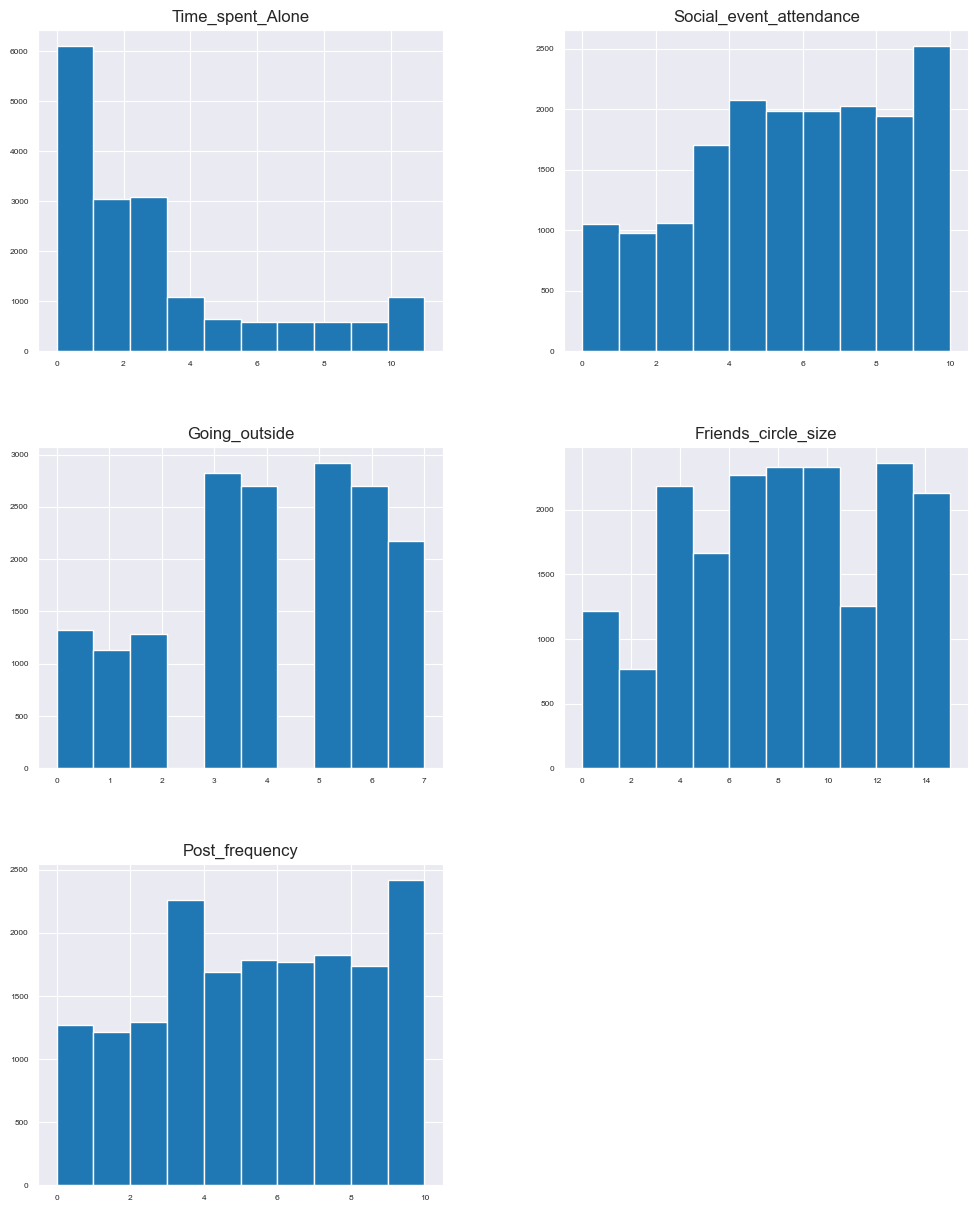

In [9]:
train_df.hist(figsize = (12,15), xlabelsize=6, ylabelsize=6)

In [10]:
train_df['Going_outside'].unique()


array([ 4.,  3.,  0.,  5., nan,  1.,  6.,  2.,  7.])

In [11]:
train_df['Friends_circle_size'] = train_df['Friends_circle_size'].astype(int)

In [12]:
train_df['Friends_circle_size'].unique()

array([15, 10,  3, 11, 13,  7,  4,  0, 14,  5,  9, 12,  8,  2,  1,  6])

In [13]:
def sum_func(df):
    result = []
    for _, row in df.iterrows():
        total = 0
        for value in row:
            if pd.isnull(value):
                continue
            elif isinstance(value, (int, float)):
                total += value
            elif isinstance(value, str):
                if value == 'Yes':
                    total += 1
                elif value == 'No':
                    total += 0
        result.append(total)
    return result

train_df['sum'] = sum_func(train_df)

In [14]:
train_df['sum'].describe()

count    18524.000000
mean        24.608724
std          7.380965
min          2.000000
25%         19.000000
50%         25.000000
75%         30.000000
max         44.000000
Name: sum, dtype: float64

<Axes: >

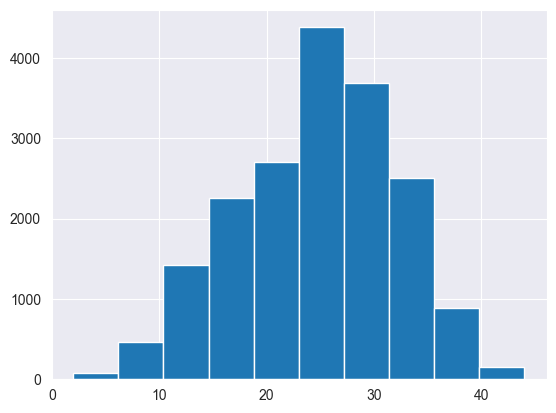

In [15]:
train_df['sum'].hist()

In [16]:
train_df['Stage_fear'] = np.where(train_df['sum'] < 20 ,'Yes','No')

In [17]:
max_sum = train_df['sum'].max()
min_sum = train_df['sum'].min()
rng = train_df['Stage_fear'].value_counts()
val = (train_df['sum'] - min_sum) // (max_sum - min_sum) * 10
train_df['Post_frequency'] = train_df['Post_frequency'].fillna(val)

In [44]:
val1 = (train_df['sum'] - min_sum) // (max_sum - min_sum)
val2 = 10 - val1
train_df  = train_df['Time_spent_Alone'].fillna(val2)

In [19]:
train_df['Post_frequency'] = train_df['Post_frequency'].astype(int)


In [20]:
train_df.isnull().sum()

Time_spent_Alone                0
Stage_fear                      0
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size             0
Post_frequency                  0
Personality                     0
sum                             0
dtype: int64

In [21]:
train_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,sum
0,0.0,No,6.0,4.0,No,15,5,Extrovert,30.0
1,1.0,No,7.0,3.0,No,10,8,Extrovert,29.0
2,6.0,Yes,1.0,0.0,NaN,3,0,Introvert,11.0
3,3.0,No,7.0,3.0,No,11,5,Extrovert,29.0
4,1.0,No,4.0,4.0,No,13,0,Extrovert,22.0
...,...,...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9,7,Extrovert,29.0
18520,1.0,No,6.0,7.0,No,6,5,Extrovert,25.0
18521,7.0,Yes,1.0,1.0,Yes,1,0,Introvert,12.0
18522,10.0,Yes,1.0,0.0,Yes,5,2,Introvert,10.0


In [22]:
train_df['Going_outside'] = train_df['Going_outside'].fillna(val)

In [23]:
train_df['Drained_after_socializing'] = np.where(train_df['sum'] < 20 ,'Yes','No')

In [24]:
train_df['Social_event_attendance'] = train_df['Social_event_attendance'].fillna(val)


In [25]:
train_df['Time_spent_Alone'] = train_df['Time_spent_Alone'].astype(int)

In [26]:
train_df['Social_event_attendance'] = train_df['Social_event_attendance'].astype(int)

In [27]:
train_df['Going_outside'] = train_df['Going_outside'].astype(int)

In [28]:
train_df['sum'] = train_df['sum'].astype(int)

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           18524 non-null  int64 
 1   Stage_fear                 18524 non-null  object
 2   Social_event_attendance    18524 non-null  int64 
 3   Going_outside              18524 non-null  int64 
 4   Drained_after_socializing  18524 non-null  object
 5   Friends_circle_size        18524 non-null  int64 
 6   Post_frequency             18524 non-null  int64 
 7   Personality                18524 non-null  object
 8   sum                        18524 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.3+ MB


In [30]:
train_df['sum'].describe()

count    18524.000000
mean        24.608724
std          7.380965
min          2.000000
25%         19.000000
50%         25.000000
75%         30.000000
max         44.000000
Name: sum, dtype: float64

In [31]:
label_encoder = LabelEncoder()
train_df['Stage_fear'] = label_encoder.fit_transform(train_df['Stage_fear'])
train_df['Drained_after_socializing'] = label_encoder.fit_transform(train_df['Drained_after_socializing'])

In [32]:
train_df['Personality'] = label_encoder.fit_transform(train_df['Personality'])

In [33]:
train_df 

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,sum
0,0,0,6,4,0,15,5,0,30
1,1,0,7,3,0,10,8,0,29
2,6,1,1,0,1,3,0,1,11
3,3,0,7,3,0,11,5,0,29
4,1,0,4,4,0,13,0,0,22
...,...,...,...,...,...,...,...,...,...
18519,3,0,7,3,0,9,7,0,29
18520,1,0,6,7,0,6,5,0,25
18521,7,1,1,1,1,1,0,1,12
18522,10,1,1,0,1,5,2,1,10


In [34]:
train = train_df.drop('Personality',axis=1)
test = train_df['Personality']

In [35]:
train

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,sum
0,0,0,6,4,0,15,5,30
1,1,0,7,3,0,10,8,29
2,6,1,1,0,1,3,0,11
3,3,0,7,3,0,11,5,29
4,1,0,4,4,0,13,0,22
...,...,...,...,...,...,...,...,...
18519,3,0,7,3,0,9,7,29
18520,1,0,6,7,0,6,5,25
18521,7,1,1,1,1,1,0,12
18522,10,1,1,0,1,5,2,10


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [37]:
X_train,X_val,y_train,y_val = train_test_split(train,test,random_state=42)

model = RandomForestClassifier(n_estimators=100,min_samples_split=2,max_depth=5,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:,1]

acc = accuracy_score(y_val,y_pred)
cm = confusion_matrix(y_val,y_pred)
roc_auc = roc_auc_score(y_val,y_pred_proba)

print(f'accuracy:{acc}')
print(f'confusion matrix:{cm}')
print(f'roc_auc_score:{roc_auc}')

accuracy:0.9669617793133233
confusion matrix:[[3354   65]
 [  88 1124]]
roc_auc_score:0.9652212881422684


In [38]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

In [39]:
model = LGBMClassifier(max_depth=5,n_estimators=200,min_samples_split=2,subsample=0.8,colsample_bytree=0.8,random_state=42,verbose=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:,1]

acc = accuracy_score(y_val,y_pred)
cm = confusion_matrix(y_val,y_pred)
roc_auc = roc_auc_score(y_val,y_pred_proba)
f1 = f1_score(y_val,y_pred,average='macro')

print(f'accuracy:{acc}')
print(f'confusion matrix:{cm}')
print(f'roc_auc_score:{roc_auc}')
print(f'f1 score:{f1}')

accuracy:0.9665299071474843
confusion matrix:[[3357   62]
 [  93 1119]]
roc_auc_score:0.9652555559738483
f1 score:0.9563312999159179


In [40]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [41]:
model = SVC(kernel='rbf',random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)

acc = accuracy_score(y_val,y_pred)
cm = confusion_matrix(y_val,y_pred)
f1 = f1_score(y_val,y_pred)

print(f'accuracy:{acc}')
print(f'confusion matrix:{cm}')
print(f'f1 score:{f1}')


accuracy:0.9667458432304038
confusion matrix:[[3355   64]
 [  90 1122]]
f1 score:0.9357798165137615


In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [43]:
model = XGBClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:,1]

acc = accuracy_score(y_val,y_pred)
cm = confusion_matrix(y_val,y_pred)
roc_auc = roc_auc_score(y_val,y_pred_proba)
f1 = f1_score(y_val,y_pred)

print(f'accuracy:{acc}')
print(f'confusion matrix:{cm}')
print(f'roc_auc_score:{roc_auc}')
print(f'f1 score:{f1}')

accuracy:0.9656661628158065
confusion matrix:[[3354   65]
 [  94 1118]]
roc_auc_score:0.9622259900748775
f1 score:0.9336116910229645


In [46]:
test_df = pd.read_csv('../data/raw/test.csv')

In [47]:
test_df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,No,5.0,5.0,No,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,24696,2.0,No,4.0,3.0,No,9.0,7.0
6173,24697,3.0,No,4.0,4.0,No,11.0,9.0
